In [1]:
import numpy as np
import matplotlib.pyplot as plt

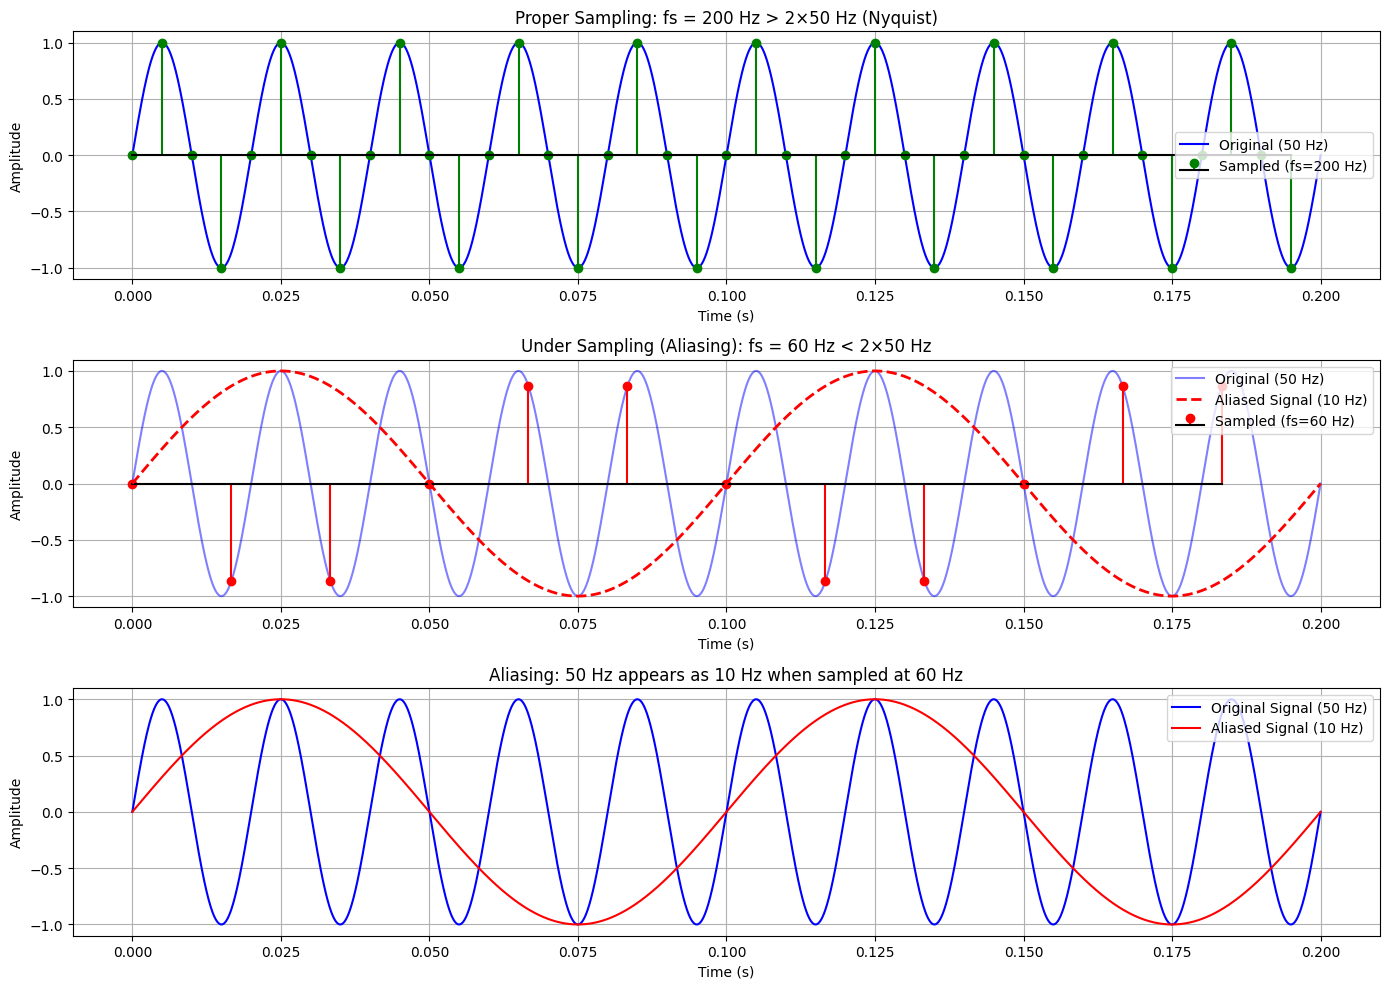

Original frequency: 50 Hz
Nyquist rate: 100 Hz
Under sampling rate: 60 Hz
Aliased frequency: |50 - 60| = 10 Hz


In [2]:
# Parameters
f = 50  # Original signal frequency (Hz)
A = 1   # Amplitude

# Continuous signal (high sample rate for visualization)
t_cont = np.linspace(0, 0.2, 5000)
x_cont = A * np.sin(2 * np.pi * f * t_cont)

# Nyquist rate: fs >= 2*f = 100 Hz
# Under sampling causes aliasing

# Proper sampling (above Nyquist rate)
fs_proper = 200  # Above Nyquist
n_proper = np.arange(0, 40)
t_proper = n_proper / fs_proper
x_proper = A * np.sin(2 * np.pi * f * t_proper)

# Under sampling (below Nyquist rate) - ALIASING
fs_under = 60  # Below Nyquist rate (should be >= 100 Hz)
n_under = np.arange(0, 12)
t_under = n_under / fs_under
x_under = A * np.sin(2 * np.pi * f * t_under)

# The aliased frequency appears as: f_alias = |f - fs| = |50 - 60| = 10 Hz
f_alias = abs(f - fs_under)
x_alias = A * np.sin(2 * np.pi * f_alias * t_cont)

# Plot results
fig, axes = plt.subplots(3, 1, figsize=(14, 10))

# Original signal with proper sampling
axes[0].plot(t_cont, x_cont, 'b-', linewidth=1.5, label=f'Original ({f} Hz)')
axes[0].stem(t_proper, x_proper, linefmt='g-', markerfmt='go', basefmt='k-', 
             label=f'Sampled (fs={fs_proper} Hz)')
axes[0].set_title(f'Proper Sampling: fs = {fs_proper} Hz > 2×{f} Hz (Nyquist)')
axes[0].set_xlabel('Time (s)')
axes[0].set_ylabel('Amplitude')
axes[0].grid(True)
axes[0].legend()

# Under sampling showing aliasing
axes[1].plot(t_cont, x_cont, 'b-', linewidth=1.5, alpha=0.5, label=f'Original ({f} Hz)')
axes[1].stem(t_under, x_under, linefmt='r-', markerfmt='ro', basefmt='k-', 
             label=f'Sampled (fs={fs_under} Hz)')
axes[1].plot(t_cont, x_alias, 'r--', linewidth=2, label=f'Aliased Signal ({f_alias} Hz)')
axes[1].set_title(f'Under Sampling (Aliasing): fs = {fs_under} Hz < 2×{f} Hz')
axes[1].set_xlabel('Time (s)')
axes[1].set_ylabel('Amplitude')
axes[1].grid(True)
axes[1].legend()

# Comparison of original and aliased frequency
axes[2].plot(t_cont, x_cont, 'b-', linewidth=1.5, label=f'Original Signal ({f} Hz)')
axes[2].plot(t_cont, x_alias, 'r-', linewidth=1.5, label=f'Aliased Signal ({f_alias} Hz)')
axes[2].set_title(f'Aliasing: {f} Hz appears as {f_alias} Hz when sampled at {fs_under} Hz')
axes[2].set_xlabel('Time (s)')
axes[2].set_ylabel('Amplitude')
axes[2].grid(True)
axes[2].legend()

plt.tight_layout()
plt.show()

print(f"Original frequency: {f} Hz")
print(f"Nyquist rate: {2*f} Hz")
print(f"Under sampling rate: {fs_under} Hz")
print(f"Aliased frequency: |{f} - {fs_under}| = {f_alias} Hz")

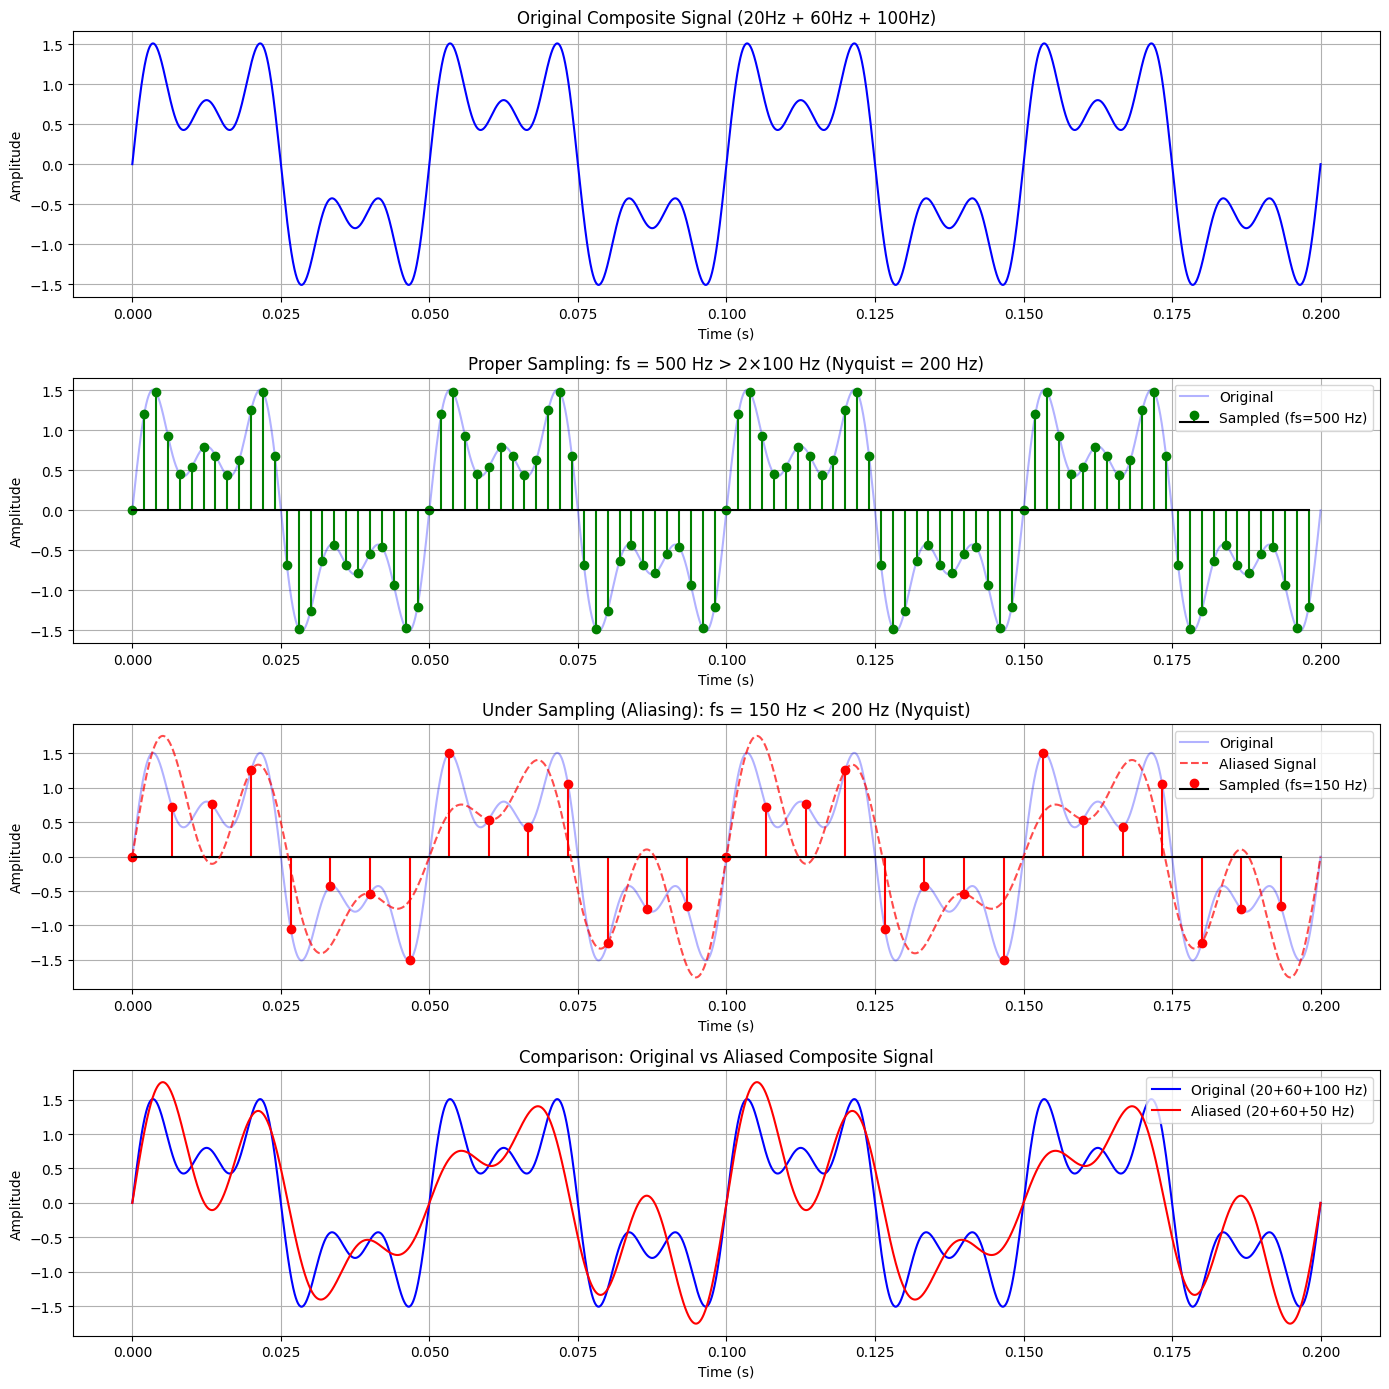

Composite Signal Aliasing Analysis:
--------------------------------------------------
Original frequencies: 20 Hz, 60 Hz, 100 Hz
Maximum frequency: 100 Hz
Nyquist rate: 200 Hz
Under sampling rate: 150 Hz (Nyquist limit: 75.0 Hz)
--------------------------------------------------
20 Hz -> 20 Hz (OK)
60 Hz -> 60 Hz (OK)
100 Hz -> 50 Hz (ALIASED)


In [3]:
# Composite signal parameters
f1, f2, f3 = 20, 60, 100  # Frequencies (Hz)
A1, A2, A3 = 1, 0.7, 0.5  # Amplitudes

# Continuous signal (high sample rate for visualization)
t_cont = np.linspace(0, 0.2, 5000)
x_cont = A1 * np.sin(2 * np.pi * f1 * t_cont) + \
         A2 * np.sin(2 * np.pi * f2 * t_cont) + \
         A3 * np.sin(2 * np.pi * f3 * t_cont)

# Nyquist rate: fs >= 2 * max_freq = 2 * 100 = 200 Hz

# Proper sampling (above Nyquist rate)
fs_proper = 500  # Well above Nyquist
n_proper = np.arange(0, 100)
t_proper = n_proper / fs_proper
x_proper = A1 * np.sin(2 * np.pi * f1 * t_proper) + \
           A2 * np.sin(2 * np.pi * f2 * t_proper) + \
           A3 * np.sin(2 * np.pi * f3 * t_proper)

# Under sampling (below Nyquist rate) - ALIASING
fs_under = 150  # Below Nyquist (should be >= 200 Hz)
n_under = np.arange(0, 30)
t_under = n_under / fs_under
x_under = A1 * np.sin(2 * np.pi * f1 * t_under) + \
          A2 * np.sin(2 * np.pi * f2 * t_under) + \
          A3 * np.sin(2 * np.pi * f3 * t_under)

# Calculate aliased frequencies
# f1 = 20 Hz: OK (20 < 75 Hz, which is fs/2)
# f2 = 60 Hz: OK (60 < 75 Hz)
# f3 = 100 Hz: ALIASED! (100 > 75 Hz) -> f_alias = |100 - 150| = 50 Hz
f1_alias = f1 if f1 < fs_under/2 else abs(f1 - fs_under)
f2_alias = f2 if f2 < fs_under/2 else abs(f2 - fs_under)
f3_alias = f3 if f3 < fs_under/2 else abs(f3 - fs_under)

# Reconstructed aliased signal
x_aliased = A1 * np.sin(2 * np.pi * f1_alias * t_cont) + \
            A2 * np.sin(2 * np.pi * f2_alias * t_cont) + \
            A3 * np.sin(2 * np.pi * f3_alias * t_cont)

# Plot results
fig, axes = plt.subplots(4, 1, figsize=(14, 14))

# Original composite signal
axes[0].plot(t_cont, x_cont, 'b-', linewidth=1.5)
axes[0].set_title(f'Original Composite Signal ({f1}Hz + {f2}Hz + {f3}Hz)')
axes[0].set_xlabel('Time (s)')
axes[0].set_ylabel('Amplitude')
axes[0].grid(True)

# Proper sampling
axes[1].plot(t_cont, x_cont, 'b-', alpha=0.3, label='Original')
axes[1].stem(t_proper, x_proper, linefmt='g-', markerfmt='go', basefmt='k-', 
             label=f'Sampled (fs={fs_proper} Hz)')
axes[1].set_title(f'Proper Sampling: fs = {fs_proper} Hz > 2×{f3} Hz (Nyquist = {2*f3} Hz)')
axes[1].set_xlabel('Time (s)')
axes[1].set_ylabel('Amplitude')
axes[1].grid(True)
axes[1].legend()

# Under sampling with aliasing
axes[2].plot(t_cont, x_cont, 'b-', alpha=0.3, label='Original')
axes[2].stem(t_under, x_under, linefmt='r-', markerfmt='ro', basefmt='k-', 
             label=f'Sampled (fs={fs_under} Hz)')
axes[2].plot(t_cont, x_aliased, 'r--', linewidth=1.5, alpha=0.7, label='Aliased Signal')
axes[2].set_title(f'Under Sampling (Aliasing): fs = {fs_under} Hz < {2*f3} Hz (Nyquist)')
axes[2].set_xlabel('Time (s)')
axes[2].set_ylabel('Amplitude')
axes[2].grid(True)
axes[2].legend()

# Original vs Aliased signal comparison
axes[3].plot(t_cont, x_cont, 'b-', linewidth=1.5, label=f'Original ({f1}+{f2}+{f3} Hz)')
axes[3].plot(t_cont, x_aliased, 'r-', linewidth=1.5, label=f'Aliased ({f1_alias}+{f2_alias}+{f3_alias} Hz)')
axes[3].set_title('Comparison: Original vs Aliased Composite Signal')
axes[3].set_xlabel('Time (s)')
axes[3].set_ylabel('Amplitude')
axes[3].grid(True)
axes[3].legend()

plt.tight_layout()
plt.show()

print("Composite Signal Aliasing Analysis:")
print("-" * 50)
print(f"Original frequencies: {f1} Hz, {f2} Hz, {f3} Hz")
print(f"Maximum frequency: {f3} Hz")
print(f"Nyquist rate: {2*f3} Hz")
print(f"Under sampling rate: {fs_under} Hz (Nyquist limit: {fs_under/2} Hz)")
print("-" * 50)
print(f"{f1} Hz -> {f1_alias} Hz {'(OK)' if f1 == f1_alias else '(ALIASED)'}")
print(f"{f2} Hz -> {f2_alias} Hz {'(OK)' if f2 == f2_alias else '(ALIASED)'}")
print(f"{f3} Hz -> {f3_alias} Hz {'(OK)' if f3 == f3_alias else '(ALIASED)'}")